In [1]:
!pip install pywaffle missingno


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pywaffle import Waffle
import matplotlib.pyplot as plt

import random
import math
import datetime
from datetime import date,datetime
from datetime import timedelta
import re
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import missingno as msno
from pywaffle import Waffle

import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'pywaffle'

In [ ]:
#Reading the Dataset
xls = pd.ExcelFile("Data/Cardiac_Outcomes.xlsx")
#Reading the Hospitalization Discharge sheet
df_HD =pd.read_excel(xls,"Hospitalization_Discharge")
#Reading the CardiacComplications sheet
df_CC = pd.read_excel(xls, "CardiacComplications")
#Reading the Responsiveness sheet
df_R = pd.read_excel(xls, "Responsivenes")
#Reading the PatientHistory sheet
df_PH = pd.read_excel(xls, "PatientHistory")
#Reading the Labs sheet
df_L = pd.read_excel(xls, "Labs")
#Reading the Demography sheet
df_D = pd.read_excel(xls, "Demography")
#Reading the patient_Prescriptions sheet
df_PP = pd.read_excel(xls, "Patient_Precriptions")

# Q1 How many patients were registered in each unique occupation?

In [4]:
df_D.groupby(["occupation"])["inpatient_number"].count()

occupation
Officer             7
Others             89
UrbanResident    1670
farmer            198
worker             17
Name: inpatient_number, dtype: int64

# Q2 Divide GCS scores into slabs of 5 and count the number of patients under each band of score. Show this as any graph of your choice

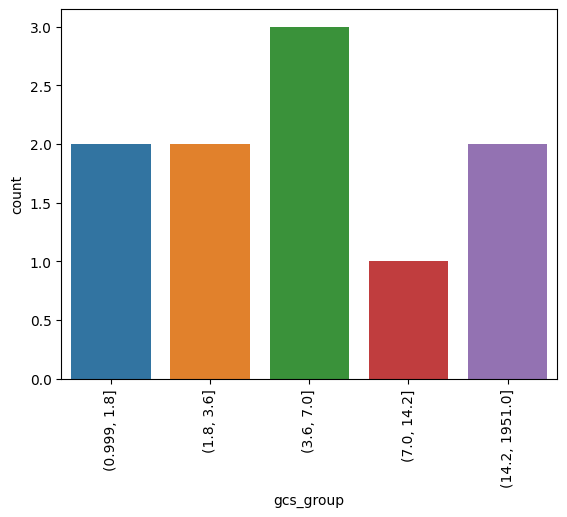

In [5]:
df_gcs = df_R.groupby(['GCS'])['inpatient_number'].count().reset_index()

df_gcs_slab = pd.DataFrame({'gcs_group': pd.qcut(df_gcs['inpatient_number'], 5)})

ax = sns.countplot(data=df_gcs_slab, x='gcs_group')
ax.tick_params(axis='x', labelrotation=90)

# Q3 Add a calculated column called Discharge date into the Hospitalization_Discharge using the information already available to you

In [6]:
df_HD["Discharge_date"] = df_HD["Admission_date"] + pd.to_timedelta(df_HD["dischargeDay"], unit='d')

df_HD.head()

inpatient_number DestinationDischarge admission_ward admission_way  \
0            857781                 Home     Cardiology  NonEmergency   
1            743087                 Home     Cardiology  NonEmergency   
2            866418                 Home     Cardiology  NonEmergency   
3            775928                 Home     Cardiology     Emergency   
4            810128                 Home     Cardiology  NonEmergency   

  discharge_department  visit_times respiratory_support oxygen_inhalation  \
0           Cardiology            1                 NaN     OxygenTherapy   
1           Cardiology            1                 NaN     OxygenTherapy   
2           Cardiology            2                 NaN     OxygenTherapy   
3           Cardiology            1                 NaN     OxygenTherapy   
4           Cardiology            1                 NaN     OxygenTherapy   

   dischargeDay Admission_date  ... re_admission_within_28_days  \
0            11     2017-01-24  ...                           0   
1             8     2017-05-05  ...                           0   
2             5     2016-11-18  ...                           0   
3            11     2017-10-02  ...                           1   
4             5     2019-11-17  ...                           0   

   death_within_3_months  re_admission_within_3_months  death_within_6_months  \
0                      0                             0                      0   
1                      0                             0                      0   
2                      0                             0                      0   
3                      0                             1                      0   
4                      0                             0                      0   

   re_admission_within_6_months  time_of_death__days_from_admission  \
0                             0                                 NaN   
1                             0                                 NaN   
2                             0                                 NaN   
3                             1                                 NaN   
4                             0                                 NaN   

   readmission_time_days_from_admission  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                  19.0   
4                                   NaN   

   return_to_emergency_department_within_6_months  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             1.0   
4                                             0.0   

   time_to_emergency_department_within_6_months  Discharge_date  
0                                           NaN      2017-02-04  
1                                           NaN      2017-05-13  
2                                           NaN      2016-11-23  
3                                          19.0      2017-10-13  
4                                           NaN      2019-11-22  

[5 rows x 22 columns]

# Q4 What percentage of patients had Biventricular heart failure?

In [7]:
df_biventricular = df_CC.loc[df_CC['type_of_heart_failure'] == 'Both']

(df_biventricular['inpatient_number'].count() / df_CC['inpatient_number'].count()) * 100

73.70517928286853

# Q5 What is the ratio of patients who were responsive to pain vs responsive to sound?

In [8]:
df_resp_to_pain = df_R.loc[df_R['consciousness'] == 'ResponsiveToPain']
df_resp_to_sound = df_R.loc[df_R['consciousness'] == 'ResponsiveToSound']

df_resp_to_pain['inpatient_number'].count() / df_resp_to_sound['inpatient_number'].count()

0.21052631578947367

# Q6 What was the average age group of the patients that had an outcome of 'Alive'?

In [9]:
df_merged = df_HD.merge(df_D, on=['inpatient_number'])

df_merged_alive = df_merged.loc[df_merged['outcome_during_hospitalization'] == 'Alive']

df_merged_alive.groupby(['ageCat'])['inpatient_number'].count()


ageCat
21-29       4
29-39      12
39-49      53
49-59     102
59-69     342
69-79     678
79-89     601
89-110     98
Name: inpatient_number, dtype: int64

# Q7 Visualize missing data and missing patterns from Demography table using the "MissingNo" Library.

<Axes: >

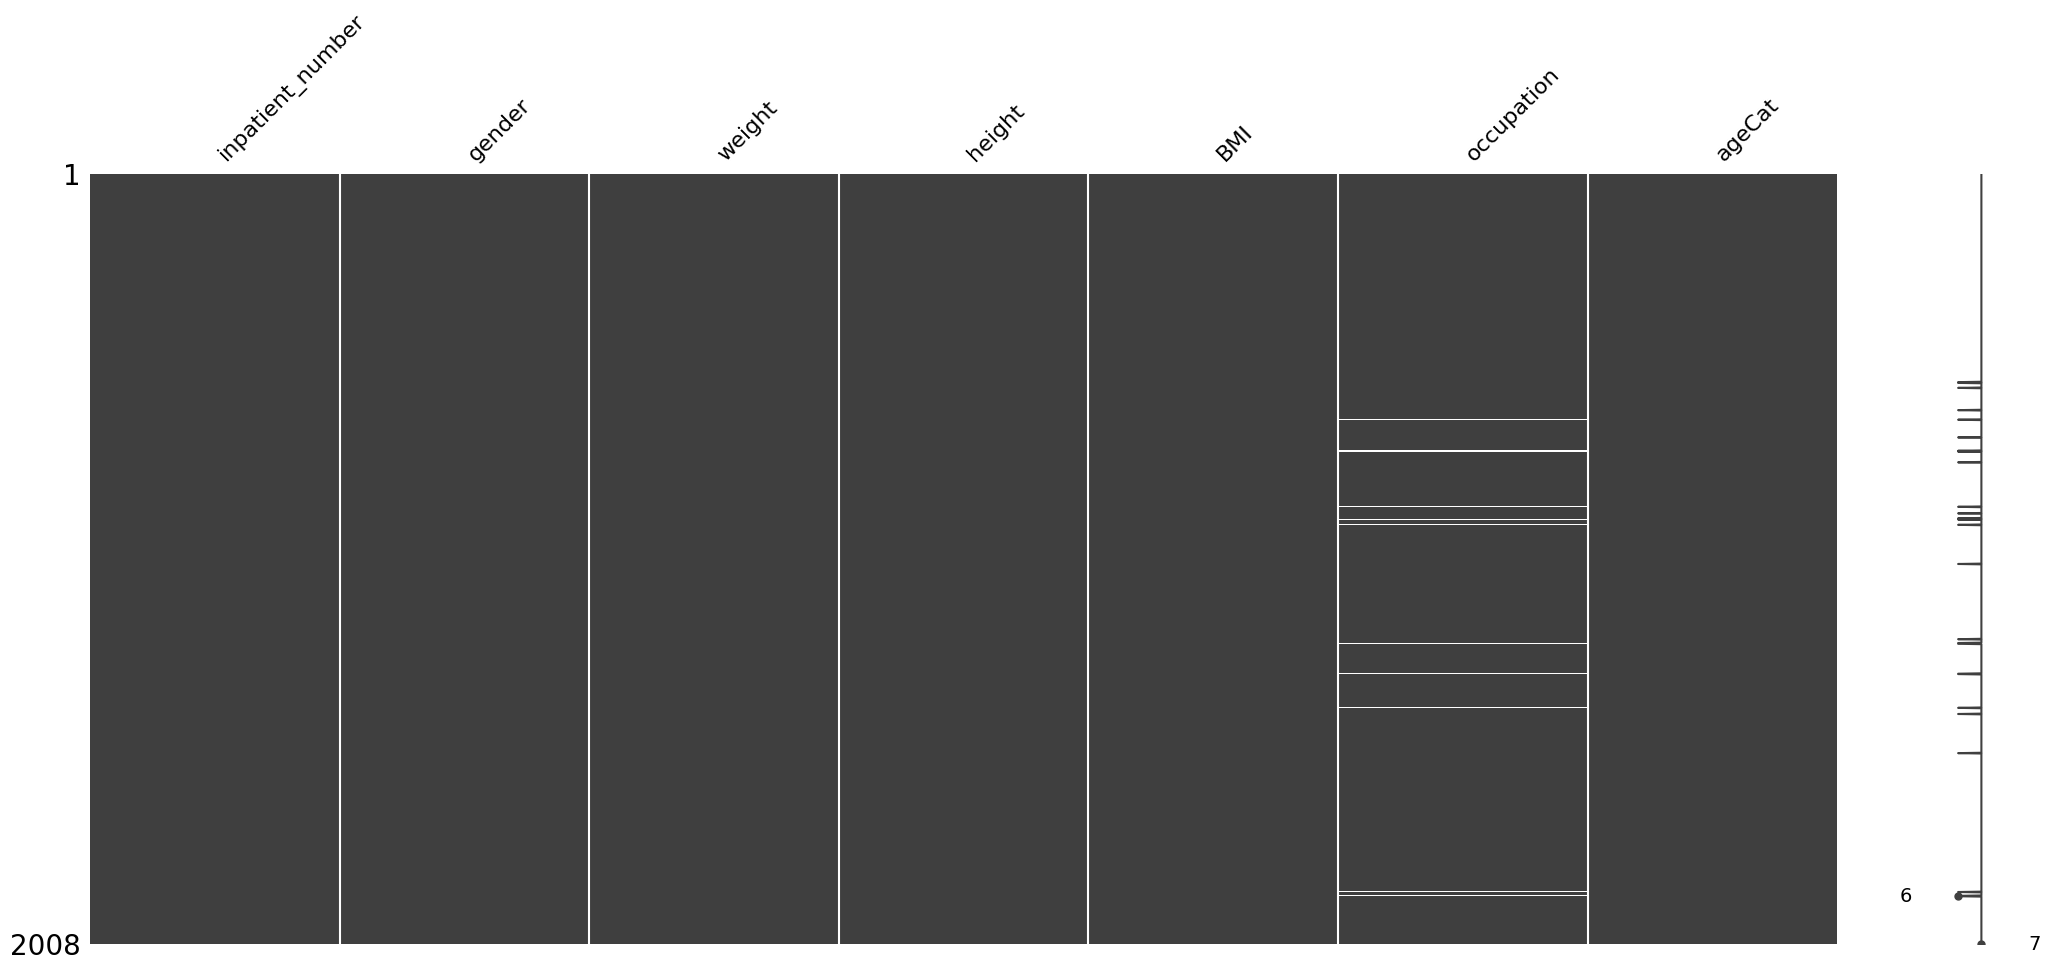

In [10]:
msno.matrix(df_D)

# Q8 Create a Waffle chart to show what percentage of total deaths belong to each admission_ward?

In [6]:
ward_deaths = df_HD[df_HD['outcome_during_hospitalization'] == 'Dead'].groupby('admission_ward').size()
total_deaths = ward_deaths.sum()

death_percentages = (ward_deaths / total_deaths) * 100

ward_death_percentage = death_percentages.round().astype(int)

print(ward_death_percentage)

fig = plt.figure(
    FigureClass=Waffle,
    columns=10,
    values=ward_death_percentage,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    labels=[f"{ward}\n({int(percentage)}%)" for ward, percentage in ward_death_percentage.items()],
    icons='square',
    icon_size=18,
    icon_legend=True
)

plt.title('Percentage of Total Deaths by Admission Ward')
plt.show()

admission_ward
Cardiology     73
GeneralWard     9
ICU             9
Others          9
dtype: int64


NameError: name 'Waffle' is not defined

# Q9 Create any 2 2-D arrays and perform matrix multiplication. Display the resulting array.

In [12]:
array1 = pd.DataFrame([[1, 2], [3, 4]])
array2 = pd.DataFrame([[5, 6], [7, 8]])

array1.dot(array2)

0   1
0  19  22
1  43  50

# Q 10Display the percentage of missing values in each column in the table labs. Show the distribution as a bar graph

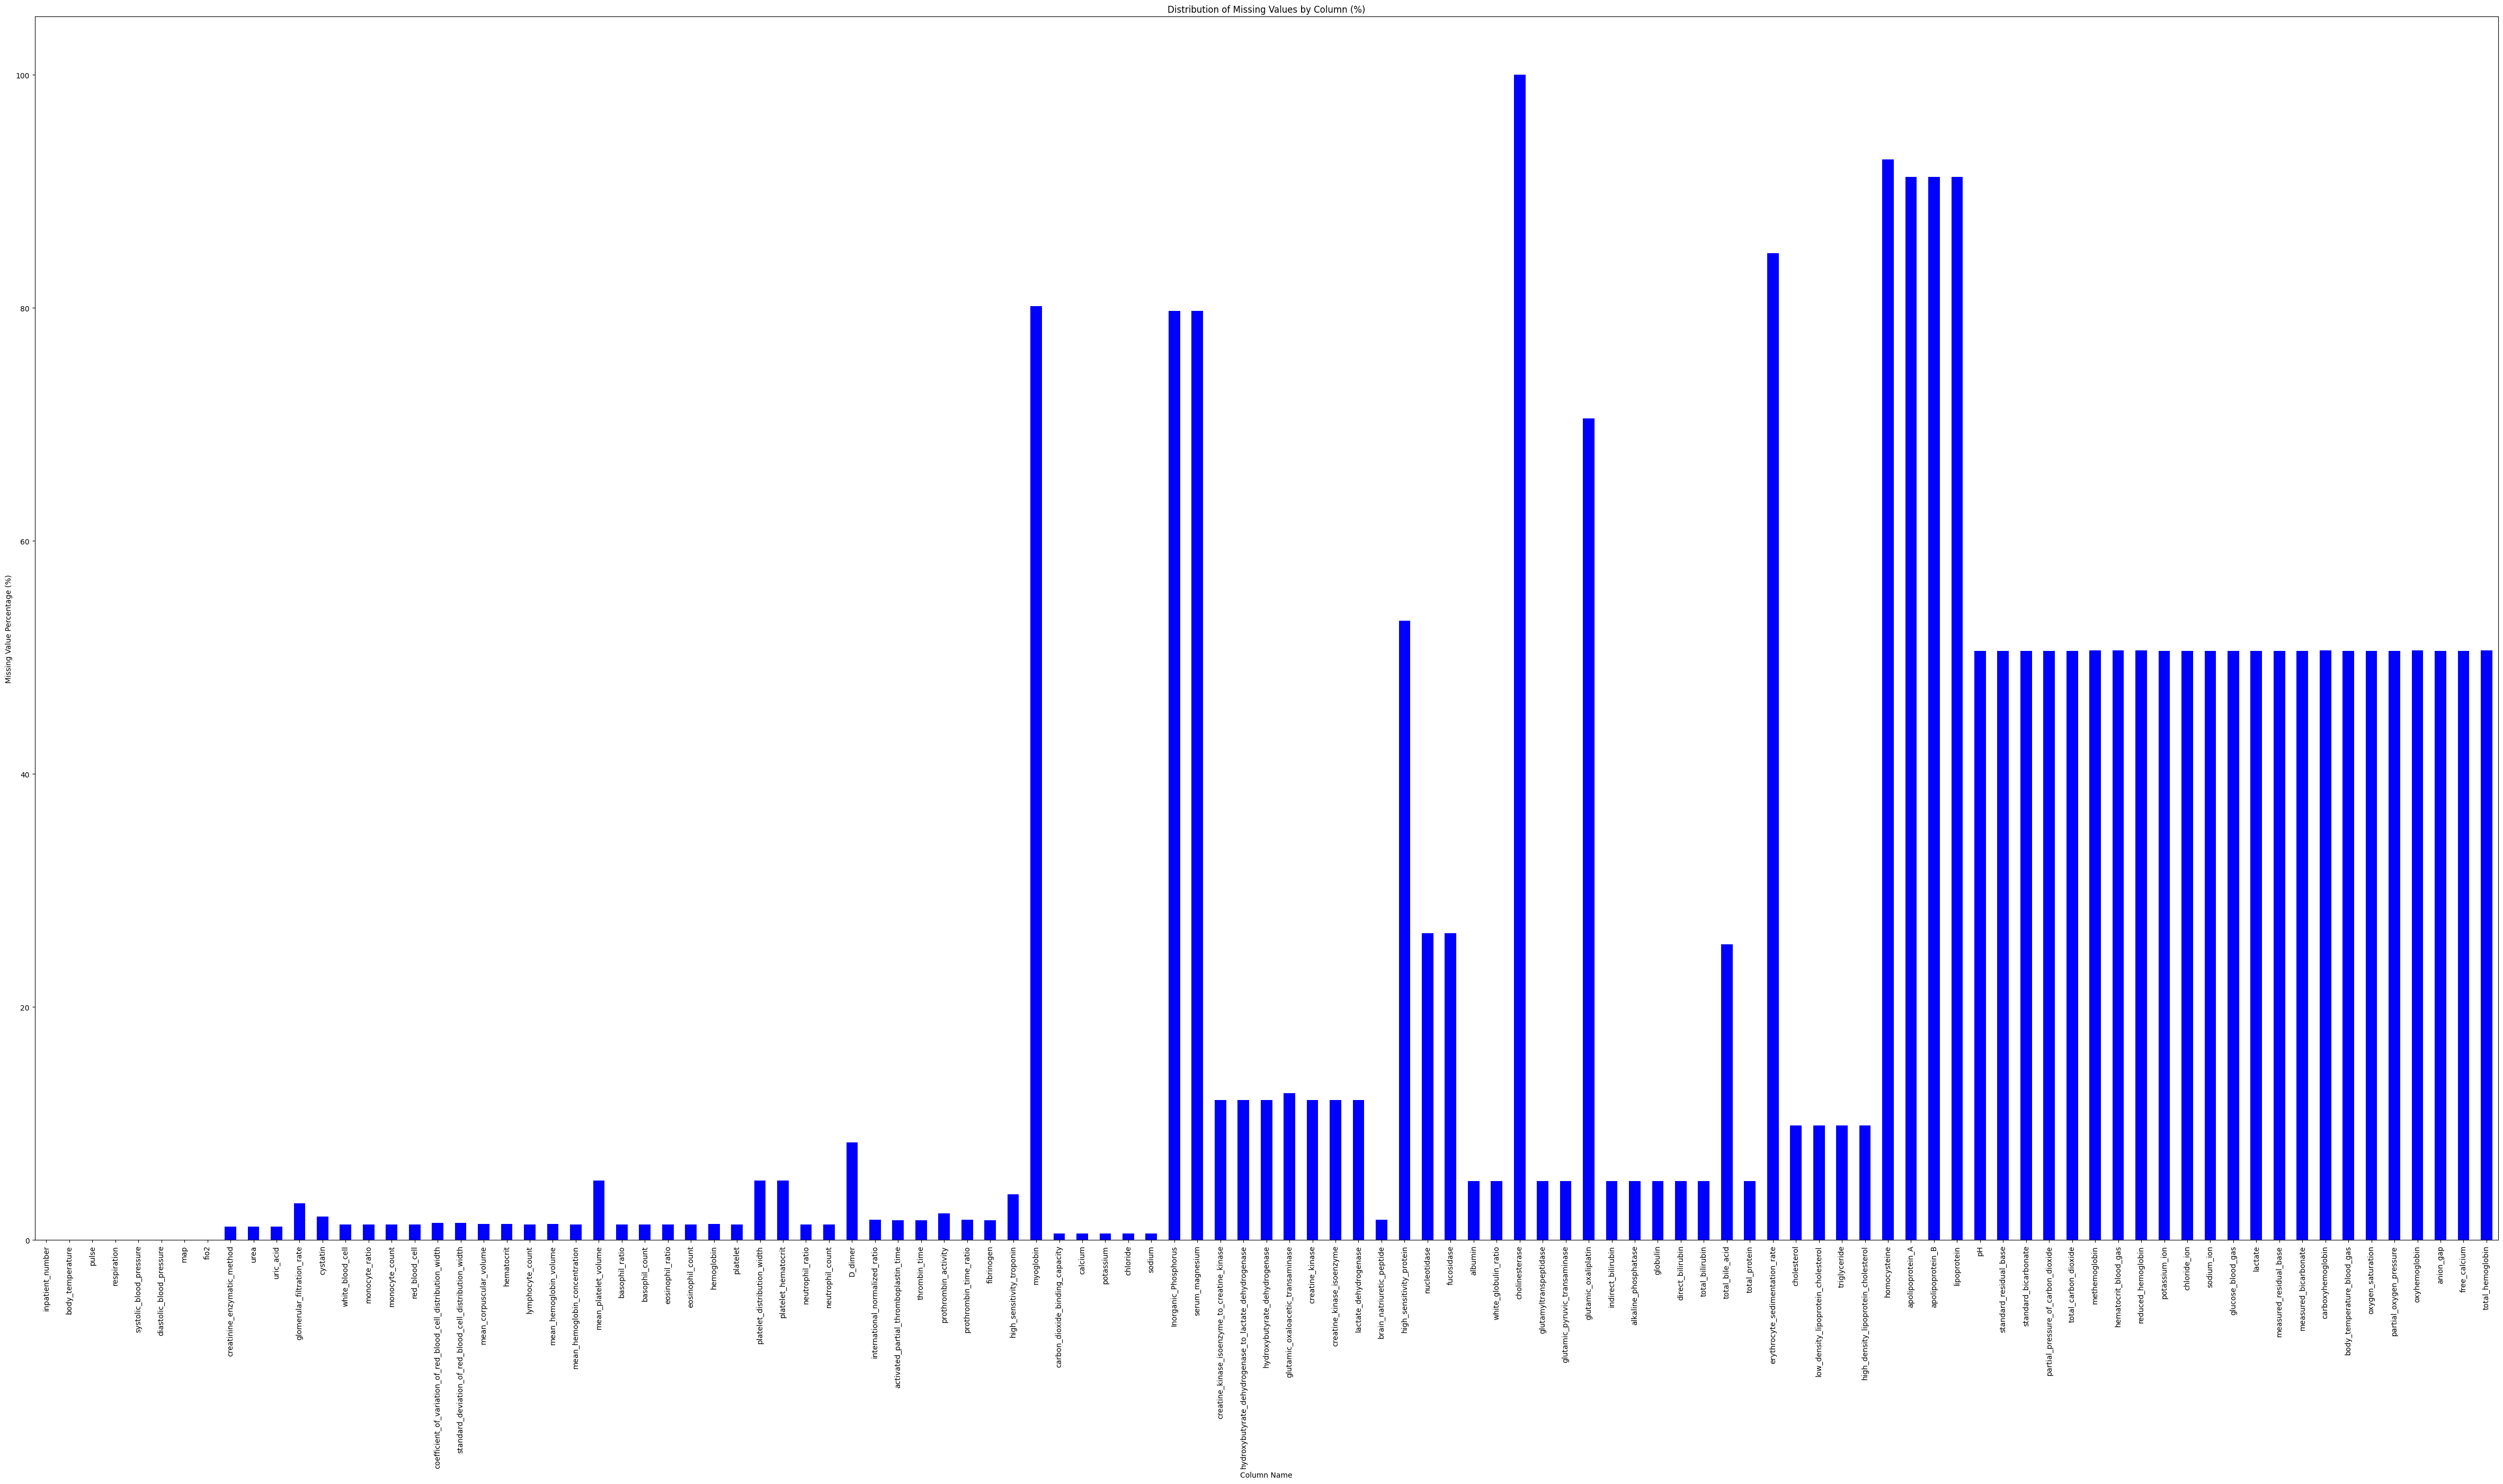

In [13]:
missing_values_percentage = (df_L.isna().sum() / len(df_L)) * 100
#print(missing_values_percentage.to_string())
plt.figure(figsize=(60, 30))
missing_values_percentage.plot(kind='bar', color='blue')
plt.title("Distribution of Missing Values by Column (%)")
plt.xlabel("Column Name")
plt.ylabel("Missing Value Percentage (%)")
plt.xticks(rotation=90)
plt.show()

# Q11 A valid mobile number is a ten digit number starting with a 7,8 or 9. For every string listed, print "YES" if it is a valid mobile number and "NO" if it is not on separate lines. Do not print the quotes.


In [15]:
if len(mobile_number) == 10 and mobile_number.startswith("7") or mobile_number.startswith("8") or mobile_number.startswith("9"):
    return "YES"
  else:
    return "NO"

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 3)

# # Q12 If left ventricular end diastolic diameter has a normal range: 3.5 - 5.6 cm, how many patients fall outside that limit and what is the MAP of most patients with this condition?

In [16]:
df_abnormal_LVEDD = df_CC[(df_CC['left_ventricular_end_diastolic_diameter_LV'] < 3.5) | (df_CC['left_ventricular_end_diastolic_diameter_LV'] > 5.6)]
df_merged = df_abnormal_LVEDD.merge(df_L, on=['inpatient_number'])

abnormal_LVEDD_count = df_abnormal_LVEDD.shape[0]
most_common_map = df_merged['map'].mode()[0]

print("Number of patients with LVEDD outside the normal range:", abnormal_LVEDD_count)
print("Most common MAP of patients with this condition:", most_common_map)

Number of patients with LVEDD outside the normal range: 1311
Most common MAP of patients with this condition: 96.6666666666667


# Q13Create a bar chart between lengthofstay and body temperature, classified as: Hypothermia, within range or hyperthermia

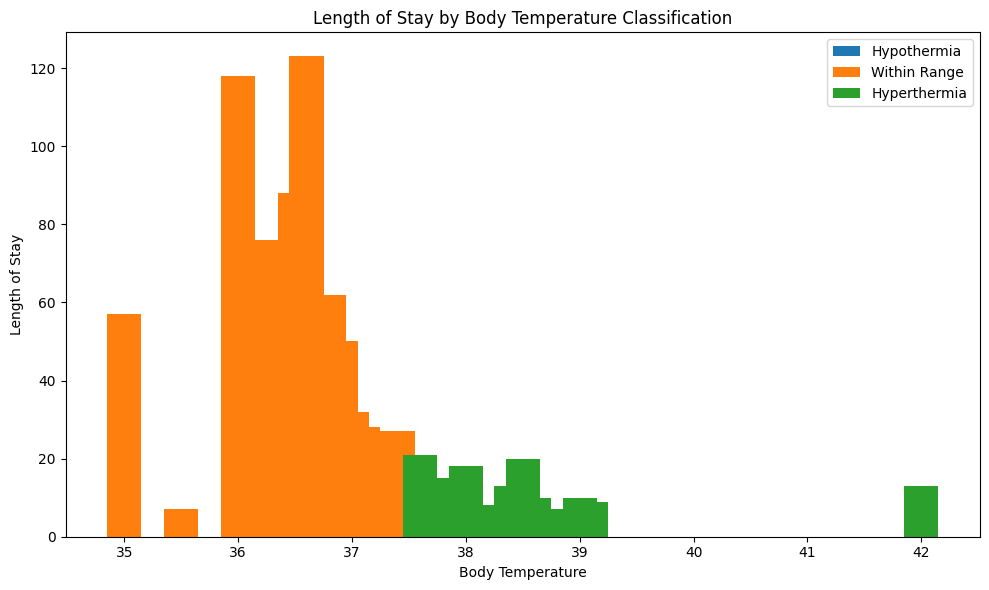

In [17]:
df_merged = df_HD.merge(df_L, on=['inpatient_number'])
hypothermia = df_merged[df_merged['body_temperature'] < 35]
within_range = df_merged[(df_merged['body_temperature'] >= 35) & (df_merged['body_temperature'] <= 37.5)]
hyperthermia = df_merged[df_merged['body_temperature'] > 37.5]

plt.figure(figsize=(10, 6))
plt.bar(hypothermia['body_temperature'], hypothermia['dischargeDay'], label='Hypothermia', width=0.3)
plt.bar(within_range['body_temperature'], within_range['dischargeDay'], label='Within Range', width=0.3)
plt.bar(hyperthermia['body_temperature'], hyperthermia['dischargeDay'], label='Hyperthermia', width=0.3)
plt.xlabel('Body Temperature')
plt.ylabel('Length of Stay')
plt.title('Length of Stay by Body Temperature Classification')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()

# Q14 Find the list of patients whose DischargeDay is greater than the value given by the user

In [18]:
user_number = input("Enter A number: ")
user_number = int(user_number)
df_custom = df_HD.loc[df_HD['dischargeDay'] > user_number]

print (df_custom)

Enter A number:  22


      inpatient_number DestinationDischarge admission_ward admission_way  \
7               787530   HealthcareFacility     Cardiology     Emergency   
63              859541                 Home     Cardiology  NonEmergency   
89              773090                 Died     Cardiology  NonEmergency   
108             796520              Unknown            ICU     Emergency   
152             791071   HealthcareFacility    GeneralWard     Emergency   
...                ...                  ...            ...           ...   
1944            784421   HealthcareFacility     Cardiology     Emergency   
1945            842942                 Home     Cardiology     Emergency   
1987            759370   HealthcareFacility         Others     Emergency   
1997            750447                 Died     Cardiology  NonEmergency   
1999            804209              Unknown         Others  NonEmergency   

     discharge_department  visit_times respiratory_support oxygen_inhalation  \
7      

# Q15 Display a pie chart of number of patients in each category listed

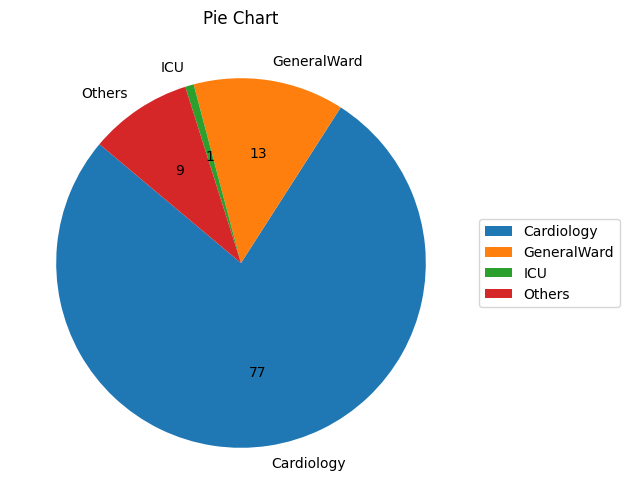

In [19]:
plt.figure(figsize=(8, 6))

patient_count = df_HD.groupby(['admission_ward'])["inpatient_number"].count()

plt.pie(patient_count, labels=patient_count.index, autopct='%1.0f', startangle=140)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('Pie Chart')
plt.show()

# Q16 Create a pivot table with myocardial_infarction, congestive_heart_failure,peripheral_vascular_disease as rows and average Uric Acid and BMI as columns, using melt functions

# Q17 Using arrays and loops find the number of patients who were Admitted in the month of November

In [20]:
count = 0
for addmissionDate in pd.to_datetime(df_HD["Admission_date"]):
    if (addmissionDate.month == 11): # 11 is November month
        count = count + 1

print('Number patients addmitted in month of November: {}'.format(count))


Number patients addmitted in month of November: 195


# Q18	Create a heatmap on any columns of your choice including at least 1 lab value

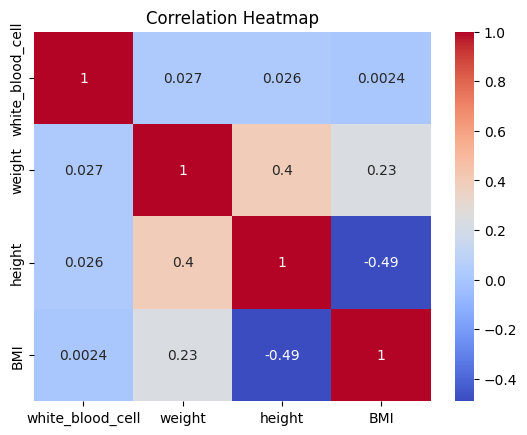

In [21]:
df_merge_heatmap = pd.merge(df_L[['inpatient_number','white_blood_cell']], df_D[['inpatient_number','weight','height','BMI']], on=['inpatient_number'])

# Calculate correlation matrix
correlation_matrix = df_merge_heatmap[['white_blood_cell','weight','height','BMI']].corr()

# Plotting heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Adding title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


# Q19	Create a bar chart by making list on Avg BMI and occupation column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method

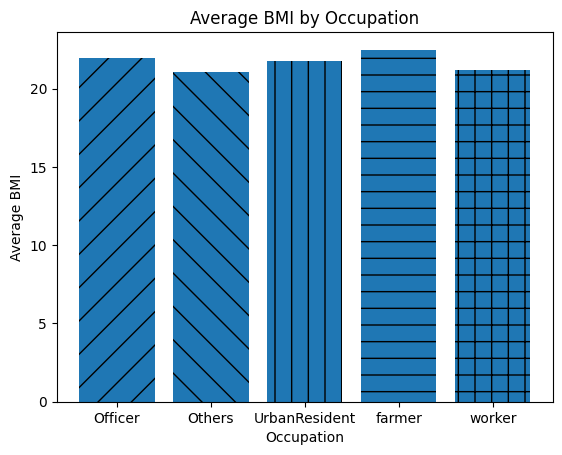

In [22]:
# Sample data (replace with your actual data)
avg_bmi_by_occupation = df_D.groupby('occupation')['BMI'].mean().to_dict()

# Plotting
fig, ax = plt.subplots()
bars = ax.bar(avg_bmi_by_occupation.keys(), avg_bmi_by_occupation.values())

# Add hatch patterns to the bars
hatches = ['/', '\\', '|','-', '+']
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

# Adding labels and title
ax.set_xlabel('Occupation')
ax.set_ylabel('Average BMI')
ax.set_title('Average BMI by Occupation')

# Display the plot
plt.show()

# Q20	You are given three integers x,y,z representing the dimensions of a cuboid along with an integer n.  
Print a list of all possible coordinates given by(i,j,k) on a 3D grid where the sum of i,j,k is not equal to n.  
x=1, y=1, z=2, n=3



In [23]:
x = 1
y = 1
z = 2
n = 3

coordinates = []

for i in range(x + 1):
    for j in range(y + 1):
        for k in range(z + 1):
            if i + j + k != n:
                coordinates.append([i, j, k])

print(coordinates)

[[0, 0, 0], [0, 0, 1], [0, 0, 2], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 2]]


# Q21	Given the names and grades for each student in a class of students, store them in a nested list and print the name(s) of any student(s) having the second lowest grade.
python_students = [['Harry', 37.21], ['Berry', 37.21], ['Tina', 37.2], ['Akriti', 41], ['Harsh', 39]]

In [24]:
python_students = [['Harry', 37.21], ['Berry', 37.21], ['Tina', 37.2], ['Akriti', 41], ['Harsh', 39]]
python_students.sort(key = lambda x: x[1])
print('Sorted Array: {}'.format(python_students))
print('Second lowest grade: {}'.format(python_students[2][1]))

gradeValue = python_students[2][1]
for student_grade in python_students:
    if (student_grade[1] == gradeValue):
        print('Students with second lowest grade: {}'.format(student_grade[0]))


Sorted Array: [['Tina', 37.2], ['Harry', 37.21], ['Berry', 37.21], ['Harsh', 39], ['Akriti', 41]]
Second lowest grade: 37.21
Students with second lowest grade: Harry
Students with second lowest grade: Berry


# Q22	Which patient was on the most number of prescribed drugs? What was his age and outcome?

In [25]:
patient_with_max_drugs = df_PP['inpatient_number'].value_counts().idxmax()
patient_age = df_D[df_D['inpatient_number']==patient_with_max_drugs]['ageCat'].values[0]
patient_outcome = df_HD[df_HD['inpatient_number']==patient_with_max_drugs]['outcome_during_hospitalization'].values[0]

print('Patient with max durgs: {}'.format(patient_with_max_drugs))
print('Patient age: {}'.format(patient_age))
print('Patient outcome during hospitalization: {}'.format(patient_outcome))


Patient with max durgs: 777204
Patient age: 79-89
Patient outcome during hospitalization: Alive


# Q23 How many patients were prescribed Digoxin?

In [26]:
print('patients were prescribed Digoxin: {}'.format(df_PP[df_PP['Drug_name'].str.contains('Digoxin')].shape[0]))

patients were prescribed Digoxin: 999


# Q24	What columns indicate a prescence of anemia? Create a severity score for anemia and prove or disprove a correlation to Length of stay

Low value of hemoglobin indicate a presence of anemia


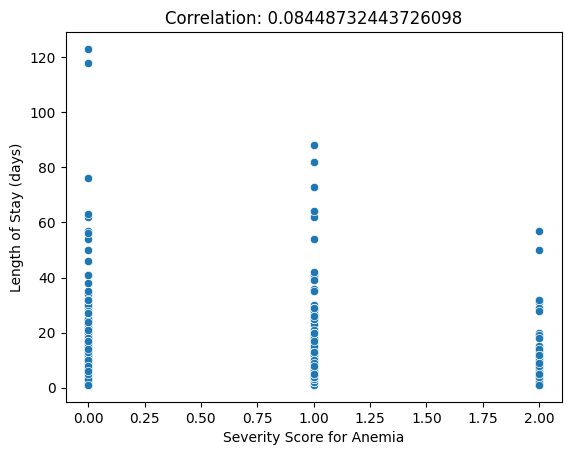

In [27]:
print('Low value of hemoglobin indicate a presence of anemia')

# Merging 'hematocrit' and 'dischargeDay' on'inpatient_number' to maintain data accuracy
df_hg_discharge_day = pd.merge(df_L[['inpatient_number','hemoglobin']], df_HD[['inpatient_number','dischargeDay']], on=['inpatient_number'])

# Create a severity score for anemia based on hematocrit levels
def severity_score(hemoglobin):
    if hemoglobin < 70:
        return 2  # Severe anemia
    elif hemoglobin < 100:
        return 1  # anemia
    else:
        return 0  # Normal

df_hg_discharge_day['Severity Score'] = df_hg_discharge_day['hemoglobin'].apply(severity_score)

# Calculate correlation
correlation = df_hg_discharge_day['Severity Score'].corr(df_hg_discharge_day['dischargeDay'])

# Plotting
sns.scatterplot(data=df_hg_discharge_day, x='Severity Score', y='dischargeDay')
plt.title(f'Correlation: {correlation}')
plt.xlabel('Severity Score for Anemia')
plt.ylabel('Length of Stay (days)')
plt.show()

# Q25	Using GCS score, how many patients are considered to be in a coma?

In [28]:
coma_gcs_score = 15
patients_in_coma = df_R[df_R['GCS'] == coma_gcs_score].shape[0];
print('Coma GCS score: {}'.format(coma_gcs_score))
print('Number of patients in coma: {}'.format(patients_in_coma))

Coma GCS score: 15
Number of patients in coma: 1951


# Q26	Create a column that randomly generates an age between the age group given for each patient. What was the average age of the patients?

In [29]:
df_D_Copy = df_D.copy()
df_D_Copy

# Create a severity score for anemia based on hematocrit levels
def generate_age(ageCategory):
    # Parse the range string
    lower_bound, upper_bound = map(int, ageCategory.split('-'))
    # Generate a random number within the specified range
    return random.randint(lower_bound, upper_bound)

df_D_Copy['age'] = df_D_Copy['ageCat'].apply(generate_age)

print('The average age of the patients: {}'.format(int(df_D_Copy['age'].mean())))


The average age of the patients: 74



# Q27	Using the age column generated in Q.26, calculate year of birth for each patient

In [30]:
def cal_birth_year(age):    
    # Current year
    current_year = datetime.now().year
    # Generate a random number within the specified range
    return current_year - age

df_D_Copy['birth_year'] = df_D_Copy['age'].apply(cal_birth_year)
df_D_Copy.head()

inpatient_number  gender  weight  height        BMI     occupation ageCat  \
0            857781    Male    50.0    1.64  18.590125  UrbanResident  69-79   
1            743087  Female    51.0    1.63  19.195303  UrbanResident  69-79   
2            866418    Male    70.0    1.70  24.221453         farmer  59-69   
3            775928    Male    65.0    1.70  22.491349  UrbanResident  69-79   
4            810128  Female    76.0    1.55  31.633715  UrbanResident  69-79   

   age  birth_year  
0   76        1948  
1   71        1953  
2   65        1959  
3   73        1951  
4   71        1953

# Q28	Store patient number and gender in a dictionary as a pair of values. Show the first 10 values


In [31]:
patient_gender_dict = dict(zip(df_D['inpatient_number'], df_D['gender']))

count = 0
for item in patient_gender_dict.items():
    if count == 10:
        break;
    count = count + 1
    print(item)

(857781, 'Male')
(743087, 'Female')
(866418, 'Male')
(775928, 'Male')
(810128, 'Female')
(823318, 'Female')
(844094, 'Male')
(787530, 'Female')
(795420, 'Female')
(829801, 'Female')


# Q29	What percentage of those in a coma also have diabetes?

In [32]:
df_coma_diabetes =  pd.merge(df_R[df_R['GCS'] == coma_gcs_score], df_PH[df_PH['diabetes']==1], on=['inpatient_number'])
diabetes_count_in_coma = df_coma_diabetes.shape[0]
print('Number of patients in coma with diabetes: {}'.format(diabetes_count_in_coma))
print('Percentage of patients in coma with diabetes: {}'.format((diabetes_count_in_coma/patients_in_coma)*100))

Number of patients in coma with diabetes: 456
Percentage of patients in coma with diabetes: 23.37262942080984


# Q30	Identify any columns relating to echocardiography and create a severity score for cardiac function. Compare this outcome and show average severity score for each outcome

# Q31	Group the days to re-admission into bins and count how many patients were in each bin

In [33]:
df_re_admission = df_HD.copy()

# Function to map values to days
def map_re_admission(row):
    if row['re_admission_within_28_days'] == 1:
        return 28
    elif row['re_admission_within_3_months'] == 1:
        return 90
    elif row['re_admission_within_6_months'] == 1:
        return 180
    else:
        return 0

# Create the new column 'readmission_in_days' using apply
df_re_admission['readmission_in_days'] = df_re_admission.apply(lambda row: map_re_admission(row), axis=1)

# Define bins for days to re-admission
bins = [0, 28, 90, 180]

# Group days to re-admission into bins and count patients in each bin
bin_counts = pd.cut(df_re_admission['readmission_in_days'], bins=bins).value_counts().sort_index()

# Display the counts in each bin
print("Counts for re-admission:")
print(bin_counts)


Counts for re-admission:
readmission_in_days
(0, 28]      140
(28, 90]     358
(90, 180]    278
Name: count, dtype: int64


# Q32	Combine admission_ward & admission_way and count the patients under the new group. Create a pie chart and explode the biggest wedge

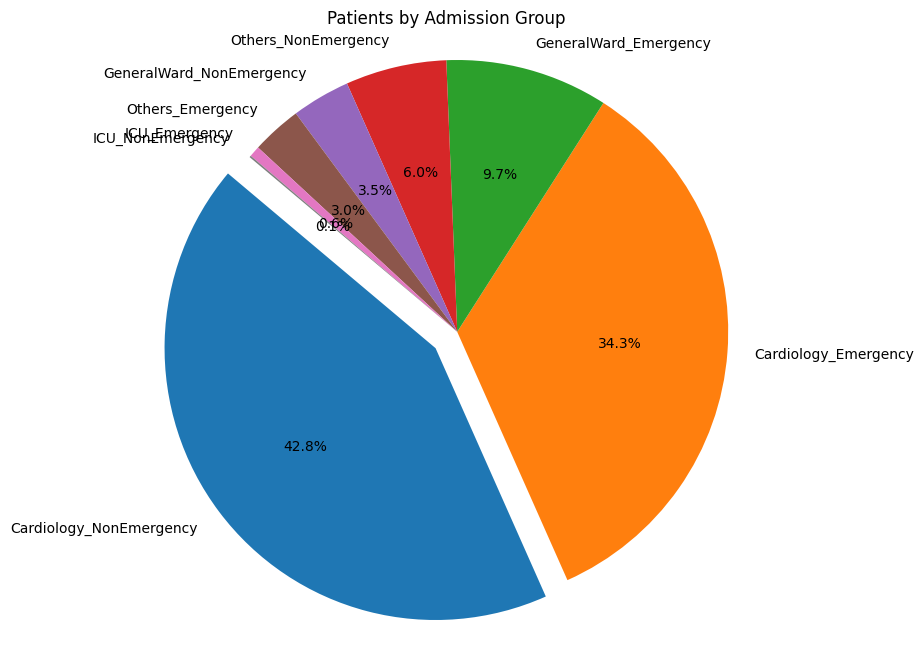

In [34]:
df_addmission_grp = df_HD.copy()

df_addmission_grp['admission_group'] = df_addmission_grp['admission_ward'] + '_' + df_addmission_grp['admission_way']

# Count the number of patients in each group
group_counts = df_addmission_grp['admission_group'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
explode = [0.1 if idx == group_counts.idxmax() else 0 for idx in group_counts.index]
plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%', explode=explode, startangle=140)
plt.title('Patients by Admission Group')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

# Q33	Retrieve the row with minimum white_blood_cell count using sorting technique.

In [35]:
df_L_Sorted = df_L.sort_values(by='white_blood_cell')
row_with_min_wbc = df_L_Sorted.iloc[0]

print("Row with minimum white_blood_cell count:")
row_with_min_wbc

Row with minimum white_blood_cell count:


inpatient_number           746068.00
body_temperature               37.10
pulse                          71.00
respiration                    20.00
systolic_blood_pressure       130.00
                             ...    
partial_oxygen_pressure        95.00
oxyhemoglobin                  96.30
anion_gap                      16.80
free_calcium                    1.11
total_hemoglobin               94.00
Name: 865, Length: 107, dtype: float64

# Q34	get the last letter of discharge_department of patients using RegEX

In [36]:

# Extract the last letter of 'discharge_department' using regex
df_HD['last_letter'] = df_HD['discharge_department'].str.extract(r'(.)$')

df_HD[['discharge_department','last_letter']].head()

discharge_department last_letter
0           Cardiology           y
1           Cardiology           y
2           Cardiology           y
3           Cardiology           y
4           Cardiology           y

# Question 35 - find the way to reverse string for given input
def reverse_sentence(sentence):
    words = sentence.split(" ")
    rev_sentence = " ".join(reversed(words))
# used reversed() method to reverse the string
    #return " ".join(reversed(words))
    return rev_sentence
sentence = input("Please enter the sentence to be reversed")
final = reverse_sentence(sentence)
print(final)

# Question 36 Use the QB style library to create any multidimensional arrays.
# Installing qbstyles
pip install qbstyles

# Question 36 Use the QB style library to create any multidimensional arrays.
import matplotlib.pyplot as plt
from qbstyles import mpl_style

def plot(dark):
    mpl_style(dark)
    fig = plt.figure() 
  
# Generate line graph 
    x = np.arange(0, 1.414*2, 0.05) 
    y1 = np.sin(x) 
    
# add_axes([xmin,ymin,dx,dy]) 
    ax = fig.add_axes([0, 0, 1, 1]) 
    ax.plot(x, y1) 
# Labeling the X Axis
    ax.set_xlabel('X Axis')
# Labeling the Y-Axis
    ax.set_ylabel('Y Axis')
# Labeling the graph
    ax.set_title('sin curve')
    
# Show plot 
plt.show() 
plot(dark=True)
plot(dark=False)

# Qn 37 - Using dischargeDay values print even if it even number and odd if it odd number
def check_even_odd (days):
    if days % 2 == 0:
      print(days, "Even")
    else:
      print(days, "Odd")
z= pd.DataFrame(df_HD)
disday = z.dischargeDay
for days in disday:
    check_even_odd(days);

# Qn.38 find the length of Tuple for any given input (Hint: Input a string from user )
#this program will split the string and convert into tuple and find length of tuple
inputstr = input("Enter a string : ")
output_tup = tuple(inputstr)
print("String Converted to Tuple\n", output_tup)
print("Length of tuple: ", len(output_tup))

# Qn.38 find the length of Tuple for any given input (Hint: Input a string from user )
#this program will split the sentence(series of words) and convert into tuple and find length of tuple
userinput = input("Enter any string")
str_to_tuple = tuple(userinput.split(" "))
print(str_to_tuple)
print("length of tuple: ", len(str_to_tuple))

# Qn 39 Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach
import matplotlib.pyplot as plt
x = np.arange(0, 10, 0.1) 
y = np.sin(np.pi * x) + x
# Class and objects are fig and axes
fig, axes = plt.subplots(2, 2)
axes[0, 0].plot(x, y, 'g--o') 
axes[0, 1].plot(y, x, 'm--o') 
axes[1, 0].plot(x, y, 'b--o')
axes[1, 1].plot(y, x, 'r--o')
fig.tight_layout()

# Qn 40 - Select 25 different random values between 200 to 800.
import random
random_num = []
for i in range(25):
    r = random.randint(200,800)
    # checking generated random num already added to the list - to give non -repeating random numbers
    if r  not in random_num:
        random_num.append(r)
print ("Below are the list of 25 non-repeating random numbers between 200 and 800 \n", random_num)

# Qn 41 -Plot the time series of Admission dates with count of patients. The X-Axis should be for every 5 months
hos_dis = pd.DataFrame(df_HD)
sns.set(style = "whitegrid")
plt.figure(figsize = (12,6)) 
patientcount_by_admission = hos_dis.groupby(['Admission_date'])['inpatient_number'].count().reset_index()
print(patientcount_by_admission)
#sns.lineplot(data = 'hos_dis', x = hos_dis.Admission_date, y = hos_dis.inpatient_number)
#plt.show()
sns.lineplot(data = 'patientcount_by_admission', x = patientcount_by_admission['Admission_date'], y = patientcount_by_admission['inpatient_number'])
ax.set_xticks(np.arange(datetime64['Admission_date'].min().date(),datetime64['Admission_date'].max().date(),step = 150))
plt.show()

# Qn 42 np.arange(1,21).reshape(4,5), find array slicing to get the elements 1,2,8,19. 
import numpy as np
Array1 =  (np.arange(1,21).reshape(4,5))
print("Array\n", Array1)
#sliced matrix
print("Element - 1\n" , Array1[:1,:1])
print("Element - 2\n" , Array1[:1,1:2])
print("Element - 8\n" , Array1[1:2,2:3])
print("Element - 19\n" , Array1[3:4,3:4])

# Qn 43 - Give distribution chart of max Killip_grade
sns.set_style('whitegrid')
cc = pd.DataFrame(df_CC)
patients_by_kilipgrade = pd.DataFrame(cc,columns =['Killip_grade']).value_counts()
print(patients_by_kilipgrade)
sns.displot(cc['Killip_grade'],kde=True, color='m', bins=25)

# Qn44:  Based on Q26 and 27 display all demographic details of patients who are born in year 1945
import random
import datetime
from datetime import date,datetime
from datetime import timedelta
df_D_Copy = df_D.copy()
df_D_Copy

# Create a severity score for anemia based on hematocrit levels
def generate_age(ageCategory):
    # Parse the range string
    lower_bound, upper_bound = map(int, ageCategory.split('-'))
    # Generate a random number within the specified range
    return random.randint(lower_bound, upper_bound)

df_D_Copy['age'] = df_D_Copy['ageCat'].apply(generate_age)

#print('The average age of the patients: {}'.format(int(df_D_Copy['age'].mean())))
def cal_birth_year(age):    
    # Current year
    current_year = datetime.now().year
    # Generate a random number within the specified range
    return current_year - age

df_D_Copy['birth_year'] = df_D_Copy['age'].apply(cal_birth_year)
print(df_D_Copy)
#Select patients only with birth year 1945
df_birth_year = df_D_Copy[df_D_Copy['birth_year'] == '1945']
print("Patients with birth year 1945\n ", df_birth_year)

# Qn 45. Create a dataframe with date and time as columns, where the values are the admission time
import datetime
from datetime import datetime
hos_dis = pd.DataFrame(df_HD)
print("Hospital Admission Original\n", hos_dis["Admission_date"])
Hosp_Admission_dttime = pd.DataFrame()
Hosp_Admission_dttime["Hosp_Adm_Date"] = pd.to_datetime(hos_dis["Admission_date"]).dt.date
Hosp_Admission_dttime["Hosp_Adm_Time"] = pd.to_datetime(hos_dis["Admission_date"]).dt.time
print("Hosp_Admission Date & Time Converted \n", Hosp_Admission_dttime)

# Qn 46 Convert occupation into numeric by Label encoding
from sklearn.preprocessing import LabelEncoder
demo = pd.DataFrame(df_D)
#copied the existing occupation into a new variable
original_occupation = demo['occupation']
demo["original_occupation"] = original_occupation
#converting string into numeric by label encoding
le = LabelEncoder()
label = le.fit_transform(demo['occupation'])
demo["occupation"] = label
#label
demo.head()

# Qn 47 Generate a 3x3 Array using Random values between 1to 9 and Fix the values and position in Next Run.
import numpy as np
Array2 =  np.random.randint(low=1, high=9, size = (3,3))
print("Array between 1 to 9\n", Array2)

# Qn 48 Using loops, create a multiplication table for the number 7
num1 = int(input("enter the multiplication table number : "))
num2 = int(input("enter upto which range want to be display"))
i = 1
while i <= num2:
    result = num1 * i
    print(i ,'x', num1, '=' ,result)
    i += 1

In [7]:
#49.Connect to sql and write a query to find all patients who have a gender of 'Male' ( Attach screenshots for this question)
r = df_D.loc[df_D['gender'] == "Male"]
print(r.loc[:, 'inpatient_number':'gender'])

      inpatient_number gender
0               857781   Male
2               866418   Male
3               775928   Male
6               844094   Male
12              802296   Male
...                ...    ...
1994            816947   Male
1997            750447   Male
2001            726701   Male
2005            781004   Male
2006            744870   Male

[845 rows x 2 columns]


In [8]:
#50.Display the lab details of the patient with maximum pulse using the .loc
Pulse = df_L['pulse']
var_Pulse = Pulse.max()
print(var_Pulse)
r = df_L.loc[df_L['pulse'] == var_Pulse]
print(r.to_markdown())


198
|     |   inpatient_number |   body_temperature |   pulse |   respiration |   systolic_blood_pressure |   diastolic_blood_pressure |   map |   fio2 |   creatinine_enzymatic_method |   urea |   uric_acid |   glomerular_filtration_rate |   cystatin |   white_blood_cell |   monocyte_ratio |   monocyte_count |   red_blood_cell |   coefficient_of_variation_of_red_blood_cell_distribution_width |   standard_deviation_of_red_blood_cell_distribution_width |   mean_corpuscular_volume |   hematocrit |   lymphocyte_count |   mean_hemoglobin_volume |   mean_hemoglobin_concentration |   mean_platelet_volume |   basophil_ratio |   basophil_count |   eosinophil_ratio |   eosinophil_count |   hemoglobin |   platelet |   platelet_distribution_width |   platelet_hematocrit |   neutrophil_ratio |   neutrophil_count |   D_dimer |   international_normalized_ratio |   activated_partial_thromboplastin_time |   thrombin_time |   prothrombin_activity |   prothrombin_time_ratio |   fibrinogen |   high_sensit

      pulse ageCat
0        87  69-79
1        95  69-79
2        98  59-69
3        73  69-79
4        88  69-79
...     ...    ...
2003    117  79-89
2004     70  79-89
2005    113  39-49
2006    134  49-59
2007    100  79-89

[2008 rows x 2 columns]


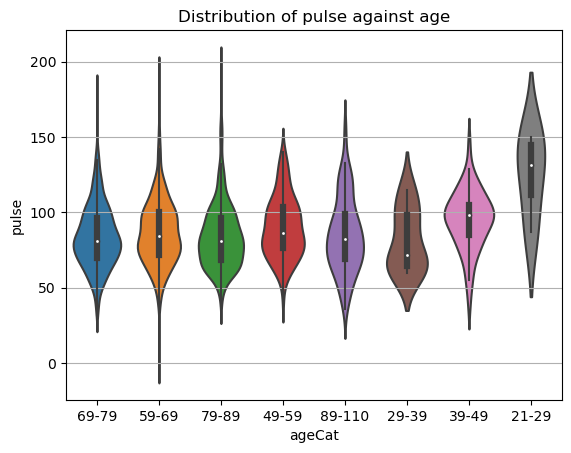

In [9]:
#51.Display a violin chart to show distribution of Pulse Rate against age.

# retain df_D and merge df_L use 'inner join'
dfv = df_D.merge(df_L, on='inpatient_number', how='inner')
dfv_1 = dfv[['pulse','ageCat']]
print(dfv_1)


fontsize = 10

fig, axes = plt.subplots()

sns.violinplot(x = 'ageCat',y = 'pulse', data=dfv_1, ax = axes)
axes.set_title('Distribution of pulse against age')

axes.yaxis.grid(True)
axes.set_xlabel('ageCat')
axes.set_ylabel('pulse')

plt.show()


      readmission_time_days_from_admission ageCat
0                                      NaN  69-79
1                                      NaN  69-79
2                                      NaN  59-69
3                                     19.0  69-79
4                                      NaN  69-79
...                                    ...    ...
2003                                   NaN  79-89
2004                                   NaN  79-89
2005                                  76.0  39-49
2006                                   NaN  49-59
2007                                   NaN  79-89

[2008 rows x 2 columns]


/opt/anaconda3/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


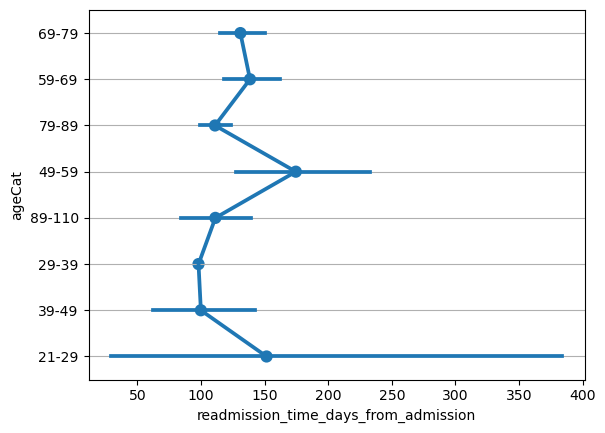

In [10]:
#52.Create a Point Plot on Age against time to readmission.

# retain df_HD and merge df_D use 'inner join'
dfv = df_D.merge(df_HD, on='inpatient_number', how='inner')
dfv_1 = dfv[['readmission_time_days_from_admission','ageCat']]
print(dfv_1)

fontsize = 10

fig, axes = plt.subplots()

sns.pointplot(x = 'readmission_time_days_from_admission', 
              y = 'ageCat', 
              data = dfv_1) 
axes.yaxis.grid(True)
axes.set_xlabel('readmission_time_days_from_admission')
axes.set_ylabel('ageCat')

plt.show()

In [11]:
#53.What is the correlation between CCI score and outcome?

# retain df_HD and merge df_PH use 'inner join'
dfv_2 = df_PH.merge(df_HD, on='inpatient_number', how='inner')
dfv_3 = dfv_2[['outcome_during_hospitalization','CCI_score']]
print(dfv_3)

def Outcome(value):
    if value == 'Alive':
        return 1.0
    if value == 'DischargeAgainstOrder':
        return 2.0
    return 3.0

dfv_4 = dfv_3.assign(outcome_during_hospitalization = dfv_3['outcome_during_hospitalization'].apply(Outcome))
print(dfv_4)

print(dfv_4.corr())

     outcome_during_hospitalization  CCI_score
0                             Alive        2.0
1                             Alive        0.0
2                             Alive        0.0
3                             Alive        2.0
4                             Alive        0.0
...                             ...        ...
2003          DischargeAgainstOrder        2.0
2004                          Alive        1.0
2005                          Alive        2.0
2006          DischargeAgainstOrder        2.0
2007                          Alive        2.0

[2008 rows x 2 columns]
      outcome_during_hospitalization  CCI_score
0                                1.0        2.0
1                                1.0        0.0
2                                1.0        0.0
3                                1.0        2.0
4                                1.0        0.0
...                              ...        ...
2003                             2.0        2.0
2004                       

In [12]:
#54. For all non-negative integers that are also even numbers in the array [0,1,2,6,8] print i*i

myArray = [0,1,2,6,8] 
for each thing in myArray: 
  print(myArray) 

SyntaxError: invalid syntax (2644086189.py, line 4)

      dischargeDay  diastolic_blood_pressure
0               11                        64
1                8                        70
2                5                        67
3               11                        74
4                5                        62
...            ...                       ...
2003             5                        80
2004             8                        86
2005            14                       100
2006             1                        72
2007             6                        80

[2008 rows x 2 columns]


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


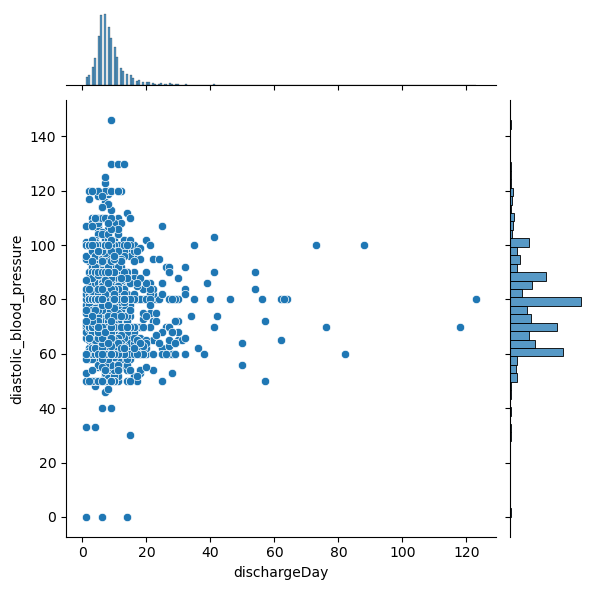

In [13]:
#55. Create a jointplot on diastolic_blood_pressure & length of stay

dfv = df_L.merge(df_HD, on='inpatient_number', how='inner')
dfv_1 = dfv[['dischargeDay','diastolic_blood_pressure']]
print(dfv_1)


sns.jointplot(x = 'dischargeDay', y = 'diastolic_blood_pressure',data = dfv_1)

In [14]:
#56.Using loc, retrieve the agegroup and weight between indices 101 and 201.

dfv = df_D[['ageCat','weight']]


print(dfv.loc[101:201])



     ageCat  weight
101   69-79    41.0
102   79-89    64.0
103   79-89    61.0
104   79-89    40.0
105   69-79    73.0
..      ...     ...
197   79-89    50.0
198  89-110    50.0
199   69-79    50.0
200   59-69    63.0
201   69-79    60.0

[101 rows x 2 columns]


In [15]:
#57. Create a pivot table show shows outcome type as rows, the admission_ward as columns and counts of patients in each category as values
dfv = df_HD[['inpatient_number','outcome_during_hospitalization','admission_ward']]


pivot = dfv.pivot_table(index =['outcome_during_hospitalization'],values = ['inpatient_number'], columns =['admission_ward'], aggfunc ='count')
print(pivot)

                               inpatient_number                       
admission_ward                       Cardiology GeneralWard ICU Others
outcome_during_hospitalization                                        
Alive                                      1472         238  12    168
Dead                                          8           1   1      1
DischargeAgainstOrder                        67          26   2     12


/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


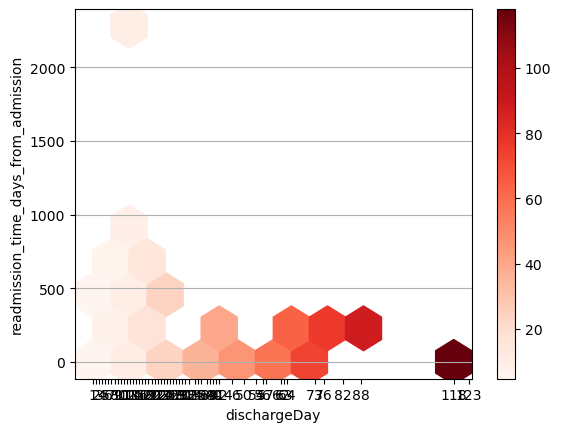

In [16]:
#58.Use Hexagonal binning to show the density of patients who were readmitted when compared to Discharge Days

fig, axes = plt.subplots()
hex_ax = axes.hexbin(x=df_HD['dischargeDay'], y=df_HD['readmission_time_days_from_admission'], C=df_HD['dischargeDay'], 
                   gridsize=10, cmap=plt.cm.Reds)
fig.colorbar(hex_ax)
axes.yaxis.grid(True)
axes.set_xlabel('dischargeDay')
axes.set_ylabel('readmission_time_days_from_admission')
plt.xticks(np.unique(df_HD['dischargeDay'].values))
plt.show()

In [17]:
#59.Using Sunburst chart display patients Age group, occupation and BMI Group
import plotly.express as px

dfv = df_D[['ageCat','occupation','BMI']]
print(dfv)
data_df = dfv.fillna('end')
fig = px.sunburst(data_df, path=["ageCat","occupation","BMI"], height = 1000)
fig.show()

     ageCat     occupation        BMI
0     69-79  UrbanResident  18.590125
1     69-79  UrbanResident  19.195303
2     59-69         farmer  24.221453
3     69-79  UrbanResident  22.491349
4     69-79  UrbanResident  31.633715
...     ...            ...        ...
2003  79-89         Others  15.555556
2004  79-89  UrbanResident  20.811655
2005  39-49  UrbanResident  25.951557
2006  49-59  UrbanResident  17.777778
2007  79-89  UrbanResident  18.730489

[2008 rows x 3 columns]


      visit_times
0               1
1               1
2               2
3               1
4               1
...           ...
2003            1
2004            1
2005            1
2006            1
2007            1

[2008 rows x 1 columns]


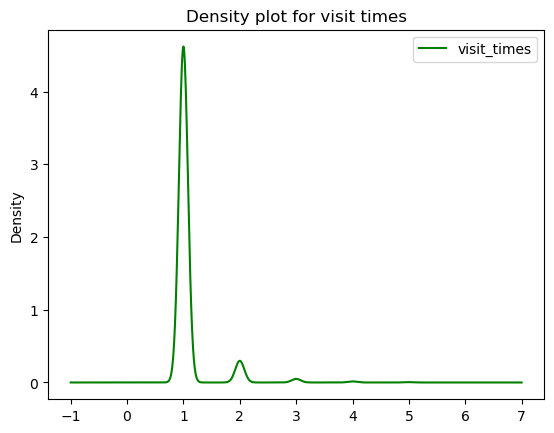

In [18]:
#60. Plot the Density Chart for visit times

dfv = df_HD[['visit_times']]
print(dfv)

dfv.plot.density(color='green') 
plt.title('Density plot for visit times') 
plt.show()

In [19]:
#61.np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.

arr = np.arange(1,31).reshape(6,5)

arr2 = arr[2:4, 0:2]
print(arr2.reshape(1,4))

[[11 12 16 17]]


In [20]:
#62.What % of all patients with an outcome of "Alive" died within 28 days. What was the mean platelet volume among this group?

dfv = df_HD[['outcome_during_hospitalization','death_within_28_days','inpatient_number']]
dfv_m = dfv.merge(df_L, on='inpatient_number', how='inner')
dfv_m1 = dfv_m[['outcome_during_hospitalization','death_within_28_days','mean_platelet_volume']]
dfv1=dfv_m1.loc[dfv_m1['outcome_during_hospitalization'] == 'Alive']
denom=dfv1.count()
print(denom)
dfv2=dfv1.loc[dfv1['death_within_28_days'] == 1]
numer=dfv2.count()
print(numer)
perc=round((numer/denom)*100,2)
print(perc)
print(dfv2['mean_platelet_volume'])


outcome_during_hospitalization    1890
death_within_28_days              1890
mean_platelet_volume              1791
dtype: int64
outcome_during_hospitalization    8
death_within_28_days              8
mean_platelet_volume              8
dtype: int64
outcome_during_hospitalization    0.42
death_within_28_days              0.42
mean_platelet_volume              0.45
dtype: float64
43      12.4
74      14.3
94      11.9
140     12.8
398     13.4
505     10.4
569     11.3
1339    14.3
Name: mean_platelet_volume, dtype: float64


In [21]:
#63. find the patients who have 'h' in their DestinationDischarge and print them

dfv = df_HD[['DestinationDischarge']]
dfv = dfv[dfv['DestinationDischarge'].str.contains('H')] 
print(dfv) 

     DestinationDischarge
0                    Home
1                    Home
2                    Home
3                    Home
4                    Home
...                   ...
2002   HealthcareFacility
2003   HealthcareFacility
2004   HealthcareFacility
2005   HealthcareFacility
2007                 Home

[1782 rows x 1 columns]


gender  ageCat
Female  21-29       3
        29-39       5
        39-49      18
        49-59      51
        59-69     190
        69-79     421
        79-89     409
        89-110     66
Male    21-29       1
        29-39       7
        39-49      38
        49-59      55
        59-69     178
        69-79     294
        79-89     237
        89-110     35
Name: gender, dtype: int64


<Axes: xlabel='gender'>

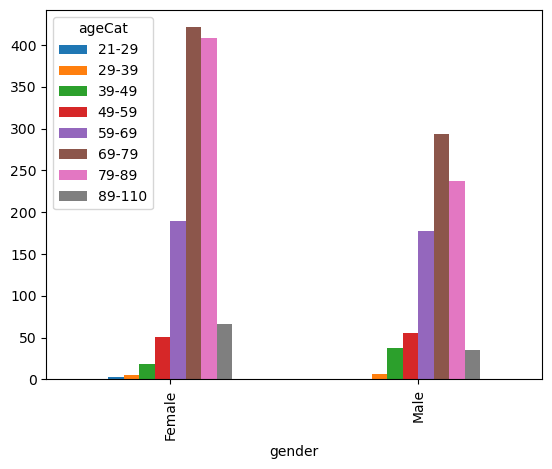

In [22]:
#64.Create a grouped bar chart that shows number of patients by gender and ageCat

dfv = df_D[['gender','ageCat']]
dfv_1 = dfv.groupby(['gender','ageCat'])['gender'].count()
print(dfv_1)
dfv_1.unstack(level=1).plot.bar()



## Q65. Which Admission Ward has maximum number of visits scheduled?¶

In [3]:
visits = df_HD['admission_ward'].value_counts()
#print("The ward wth admission visits:  \n",visits)
print("The ward with maximum admission visits: ", visits.idxmax(), visits.max())

NameError: name 'df_HD' is not defined

## Q66. Display total count of patients in each discharge_department based on gender?

In [ ]:
# first, merged the Hospitalization_discharge and Demography sheets merged to get the discharge_department and gender
# then extract the desired columns data

join_hosdischarge_demography  = pd.merge(df_HD, df_D, on= 'inpatient_number', how = 'inner')
#print(join_hosdischarge_demography )

patients_by_gender = pd.DataFrame(join_hosdischarge_demography,columns =['discharge_department', 'gender']).value_counts()
print("Total count of patients in each discharge_department based on gender:  \n" , patients_by_gender)

## Q67. How many Unique patients were precribed each type of medication?

In [ ]:
patient_prescription=pd.DataFrame(df_PP)
drug_name=patient_prescription.Drug_name.unique()
print("Prescribed drug names count:" ,len(drug_name))

unique_patient = patient_prescription.groupby('inpatient_number')['Drug_name'].nunique()
print(unique_patient)
result = unique_patient[unique_patient == patient_prescription['Drug_name'].nunique()].index.tolist()
print(result)

## Q68. Find 5 patients with the highest Discharge days greater than 20. List their most common outcome

In [ ]:
# first got the data with discharge days greater than 20 days. Then by using 'nlargest' got the highest discharge days patients.
discharge_day = df_HD[df_HD['dischargeDay'] > 20]
discharge_day_new =discharge_day[['inpatient_number','dischargeDay','outcome_during_hospitalization']]

print("5 patients with the highest discharge days greater than 20 and their most most common outcome during hospitalization:  \n",
      discharge_day_new.nlargest(5, 'dischargeDay'))


## Q69. Get the list of patient ID's which are not there in prescriptions but in demographics?

In [ ]:
#intersection: inpatient number in both sheets Patient prescricptions and list Demographics
pp_demogrphics = np.intersect1d(df_PP['inpatient_number'], df_D['inpatient_number'])

#union of two lists
union_of_pp_d = np.union1d(df_PP['inpatient_number'], df_D['inpatient_number'])

#only in list Patient prescricptions
list_patinet_pres = np.setdiff1d(df_PP['inpatient_number'], df_D['inpatient_number'])
#print("List of patients in patinet prescribed:" ,list_patinet_pres)

#only in list list Demographics
list_demographics = np.setdiff1d(df_D['inpatient_number'], df_PP['inpatient_number'])
print("List of patients which are not in patient prescription but in demographics:", list_demographics)


## Q70. On average, what is the most frequent weekday of admission?

In [ ]:
# Create a date range
range_of_dates = pd.date_range(start ='2016-01-01', end = '2019-12-31')

#create a dataframe with the dates
weekday = pd.DataFrame(df_HD, columns = ['Admission_date'])

# add a column with the day of the week
weekday['day_of_week'] = weekday['Admission_date'].dt.dayofweek

#map the day of the week number to its name
weekday['day_of_week'] = weekday['day_of_week'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
  })

print("Most frequent weekday of admission: ", weekday['day_of_week'].value_counts().nlargest(1))

## Q71. Which year had the maximum admissions?

In [ ]:
range_of_dates = pd.Series(pd.date_range(start ='2016-01-01', end = '2019-12-31'))
print("Maximum admissions year:" ,range_of_dates.dt.year.max())

## Q72. What % of the dataset is male vs female?

In [ ]:
# first gor the count of gender, then get the male and female count,then calculated the percentage
df = pd.DataFrame(df_D);
gender = df.get('gender')
print("Total count of gender:" , gender.count())
print()
male_female_count = gender.value_counts()
print("No. of Male and Female : \n" ,male_female_count )

male_count = male_female_count .loc['Male']
female_count =male_female_count .loc['Female']
print()
print("Percentage of Male:" , round((male_count/ gender.count())*100.0 ,2))
print("Percentage of Female:" , round((female_count/ gender.count())*100,2))

## Q73. Which patient in the youngest age category weighs the most?

In [ ]:
# sort the table by agecategory, then find the youngest age. Then split the table to only obtain youngest age category data
# sort the youngest age category data by weight in descending order to get the most weighed patient

data= pd.DataFrame(df_D);
sort_data_age = data[['ageCat', 'weight']].sort_values(by=['ageCat'] ,ascending =True)
youngest_age = sort_data_age['ageCat'].iloc[0]
youngest_age_data = sort_data_age.loc[sort_data_age['ageCat']== youngest_age]
print("The patient in the youngest age catergory wighed the most: \n",youngest_age_data.sort_values('weight', ascending =False).iloc[0])

## Q74.Which adm ward had the lowest rate of Outcome Death?

In [ ]:
admission_outcome = pd.DataFrame(df_HD, columns = ['admission_ward', 'outcome_during_hospitalization'] )

outcome_deadonly= (admission_outcome.loc[admission_outcome['outcome_during_hospitalization']=='Dead'])

print("The admission ward had the lowest rate of outcome Death:\n","\n",outcome_deadonly.value_counts().nsmallest(1, 'all'))


## Q75. What % of those with an outcome of death, had myocardial infarction?

In [ ]:
# first meged the hospitalization discharge and cardiac complication sheets
# got the count of outcome during hospitalizations, then extracted the 'dead' value
#got the count of myocardial infraction, then combined the data of both, converted in to percentage

join_hosdischarge_cardiaccom  = pd.merge(df_HD, df_CC, on= 'inpatient_number', how = 'inner')

count_of_outcome = join_hosdischarge_cardiaccom['outcome_during_hospitalization'].value_counts()
#print("count of outome during hospitalization:\n",count_of_outcome)

count_of_dead = count_of_outcome.loc['Dead']
#print()
#print("count of 'Dead' during outcome of hospitalization:",count_of_dead )

count_of_myocardial = join_hosdischarge_cardiaccom['myocardial_infarction'].value_counts()
#print("patient count with myocardial infarction:\n",count_of_myocardial)

patients_by_myo = pd.DataFrame(join_hosdischarge_cardiaccom ,columns =['myocardial_infarction', 'outcome_during_hospitalization']).value_counts()
#print()
#print("Patient outcome during hospitalization with myocardial infraction:\n",patients_by_myo)

count_of_myo_dead = patients_by_myo.loc[1,'Dead']
#print(count_of_myo_dead)
#print()
print("Percent of 'Dead' during outcome hospitalization with myocardial infraction:",round((count_of_myo_dead/count_of_dead)*100.0,2))

## Q76. What is the ratio of those with congestive heart failure to those who had type of heart failure Both?

In [ ]:
a = pd.DataFrame(df_CC, columns = ['type_of_heart_failure'] )
type_heart_failure= (a.loc[a['type_of_heart_failure']=='Both'])
heart_failure_count= type_heart_failure.count()
print("count of type of heart failure:", heart_failure_count)

b = pd.DataFrame(df_CC, columns = ['congestive_heart_failure'] )
congestive= (b.loc[b['congestive_heart_failure']==1])
congestive_heart_failure_count = congestive.count()
print("count of congestive heart failure:", congestive_heart_failure_count)

ratio = float(heart_failure_count)/float(congestive_heart_failure_count)
print("ratio of those with congestive heart failure to those who had type of heat failure both:" , round(ratio,2))

## Q77.LIst the number of cardiogenic shock patients based on hospitalization outcome, having a severe GCS score(higher risk of death)

In [ ]:
join_hosdischarge_Response_cardiaccomp = pd.merge(pd.merge(df_HD,df_CC,on='inpatient_number'),df_R,on = 'inpatient_number')
#join_hosdischarge_Response_cardiaccomp

gcs= (join_hosdischarge_Response_cardiaccomp.loc[join_hosdischarge_Response_cardiaccomp['GCS']<=8])

gcs_new = pd.DataFrame(gcs, columns= ['Killip_grade','outcome_during_hospitalization'])
cc_patients_basedon_hospitalization = gcs_new.groupby(['Killip_grade']).value_counts()
print("No.of cardiogenic shock patients based on hospitalization outcome with high GCS score:\n","\n",cc_patients_basedon_hospitalization) 

## Q78.Give the count of patients who have experinced tachicardia or bradycardia.

In [ ]:
# Tachicardia means, where the heart rate is faster than normal, usually more than 100 beats per  minute
#Bradycardia is a slower than normal heart rate. A normal heart is in between 60-100 beats per minute

df = pd.DataFrame(df_CC, columns =['myocardial_infarction'])
print("Patients who experience tachicardia or bradycardia:\n",df.loc[df['myocardial_infarction']==1].count())


## Q79. Create a Funnel chart of BMI Category(Normal Weight, Underweight and Obese)

In [ ]:
df = pd.DataFrame(df_D)
under_weight = df.loc[(df['BMI']>=0) & (df['BMI']<=18.9), 'BMI']
normal_weight = df.loc[(df['BMI']>=18.9) & (df['BMI']<=25.0), 'BMI']
obese = df.loc[(df['BMI']>=25.0) , 'BMI']
print(under_weight.count())
print(normal_weight.count())
print(obese.count())

bmi_data = dict(
     bmi_range = [normal_weight.count(),under_weight.count(), obese.count()],
    bmi_category = ["Normal Weight", "Underweight", "Obese", ])
funnel_bmi = px.funnel(bmi_data, x ='bmi_range', y='bmi_category')
funnel_bmi.show()

## Q80. Delete the column age from Q26 iteratively.

In [ ]:
for col in df_D_Copy.columns:
    if  col == 'age':
        del df_D_Copy[col]

print("deleted the coumn 'age':\n","\n",df_D_Copy) 